***To analyze movie ratings data and recommend movies to users based on their preferences using data analytics techniques***

In [32]:
git_username = "Aryan210804" # Replace with your GitHub username
git_email = "aryankumar735588gmail.com" # Replace with your GitHub email

!git config --global user.name "{git_username}"
!git config --global user.email "{git_email}"

# Initialize a new Git repository in the current directory
!git init

Reinitialized existing Git repository in /content/.git/


In [33]:
# Add all files in the current directory to the staging area
!git add .

# Commit the staged files with a message
!git commit -m "Initial commit of Colab project"

On branch master
nothing to commit, working tree clean


In [34]:
github_repo_url = "https://<YOUR_PERSONAL_ACCESS_TOKEN>@github.com/Aryan210804/Movie_Recommendation_Analysis.git" # <--- REPLACE THIS WITH YOUR PAT

# Remove existing remote 'origin' if it exists (to fix the previous error)
!git remote remove origin

# Add the remote repository with the corrected URL
!git remote add origin {github_repo_url}

# Push the local changes to the remote repository. The default branch might be 'main' or 'master'.
# If 'master' fails, try 'main'.
!git push -u origin master

# If the above fails with 'master' not found, try 'main':
# !git push -u origin main

error: No such remote: 'origin'
/bin/bash: line 1: YOUR_PERSONAL_ACCESS_TOKEN: No such file or directory
fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshshinde8/movies-csv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'movies-csv' dataset.
Path to dataset files: /kaggle/input/movies-csv


In [37]:

# Download latest version
path = kagglehub.dataset_download("denniskevogo/ratingscsv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ratingscsv' dataset.
Path to dataset files: /kaggle/input/ratingscsv


In [38]:
movies_path = '/root/.cache/kagglehub/datasets/harshshinde8/movies-csv/versions/1'
ratings_path = '/root/.cache/kagglehub/datasets/denniskevogo/ratingscsv/versions/1'

In [39]:

movies = pd.read_csv(os.path.join(movies_path, 'movies.csv'))
ratings = pd.read_csv(os.path.join(ratings_path, 'ratings.csv'))

In [40]:
movies =pd.read_csv
ratings =pd.read_csv

View Dataset

In [41]:
import os

# Re-load the movies DataFrame because it was overwritten by a previous cell
movies = pd.read_csv(os.path.join(movies_path, 'movies.csv'))
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [42]:
ratings = pd.read_csv(os.path.join(ratings_path, 'ratings.csv'))
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Dataset Information

In [43]:
ratings.info()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4

Data Cleaning

In [44]:
movies.isnull().sum()
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [45]:
ratings.dropna(inplace=True)
movies.dropna(inplace=True)


Merge Datasets

In [46]:
data = pd.merge(ratings, movies, left_on="movieId", right_on="id")
data.head()

,userId,movieId,rating,timestamp,index,budget,genres,homepage,id,keywords,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,2,161,3.0,835355493,388,85000000,Thriller Crime,http://www.warnerbros.co.uk/movies/oceans-eleven,161,prison pickpocket strip club con artist atlant...,...,116.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,Are you in or out?,Ocean's Eleven,7.2,3783,George Clooney Brad Pitt Matt Damon Andy Garc\...,"[{'name': 'Debra Zane', 'gender': 1, 'departme...",Steven Soderbergh
1,2,165,3.0,835355441,1152,40000000,Adventure Comedy Family Science Fiction,http://www.backtothefuture.com/movies/backtoth...,165,skateboarding flying car car race delorean lig...,...,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Roads? Where we're going, we don't need roads!",Back to the Future Part II,7.4,3829,Michael J. Fox Christopher Lloyd Lea Thompson ...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
2,2,253,4.0,835355511,3343,7000000,Adventure Action Thriller,http://www.mgm.com/view/movie/1130/Live-and-Le...,253,london england new york bomb england spy,...,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Roger Moore is James Bond.,Live and Let Die,6.4,533,Roger Moore Yaphet Kotto Jane Seymour Clifton ...,"[{'name': 'Guy Hamilton', 'gender': 2, 'depart...",Guy Hamilton
3,2,272,3.0,835355767,119,150000000,Action Crime Drama,http://www2.warnerbros.com/batmanbegins/index....,272,himalaya martial arts dc comics crime fighter ...,...,140.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Evil fears the knight.,Batman Begins,7.5,7359,Christian Bale Michael Caine Liam Neeson Katie...,"[{'name': 'Lucinda Syson', 'gender': 1, 'depar...",Christopher Nolan
4,2,350,4.0,835355697,1366,35000000,Comedy Drama Romance,http://www.devilwearspradamovie.com/,350,paris journalist journalism world of fasion fa...,...,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Meet Andy Sachs. A million girls would kill to...,The Devil Wears Prada,7.0,3088,Meryl Streep Anne Hathaway Emily Blunt Stanley...,"[{'name': 'Wendy Finerman', 'gender': 1, 'depa...",David Frankel


Exploratory Data Analysis

In [47]:
popular_movies = data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
popular_movies


,rating
title,
Men in Black II,224
Silent Hill,215
License to Wed,202
Bridge to Terabithia,165
Syriana,158
Titanic,147
Back to the Future Part II,142
The Talented Mr. Ripley,131
Live and Let Die,125


In [48]:
top_rated_movies = data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
top_rated_movies


,rating
title,
1408,5.000
"You, Me and Dupree",5.000
Changeling,5.000
Captain America: The First Avenger,5.000
Spider-Man 3,5.000
Orgazmo,5.000
Speed Racer,4.750
Before Sunset,4.625
Hard Candy,4.500


Visualization

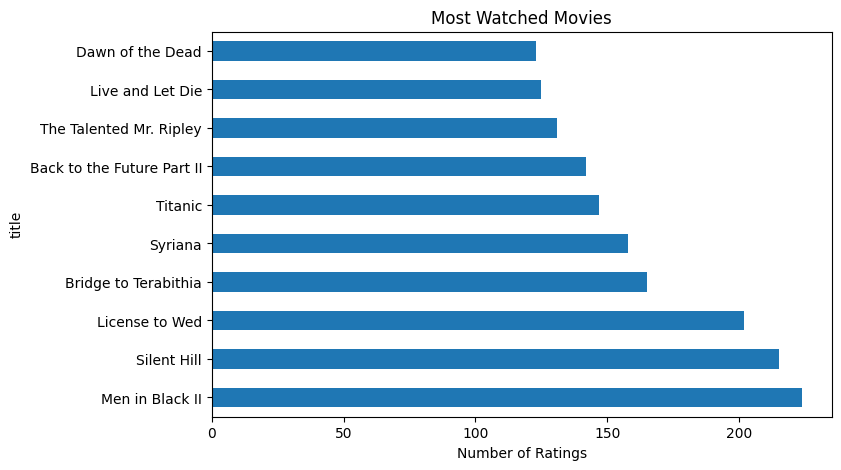

In [49]:
popular_movies.plot(kind='barh', figsize=(8,5), title="Most Watched Movies")
plt.xlabel("Number of Ratings")
plt.show()

Create Recommendation System

In [50]:
movie_matrix = data.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,1408,2046,21 Grams,300,8 Mile,A Beautiful Mind,A Dangerous Method,A Hard Day's Night,A Mighty Heart,A Scanner Darkly,...,Transformers: Revenge of the Fallen,Twilight,U-571,Underworld,Underworld: Evolution,Volver,X-Men Origins: Wolverine,You Only Live Twice,"You, Me and Dupree",xXx
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
movie_name = "Men in Black II"

similar_movies = movie_matrix.corrwith(movie_matrix[movie_name])
similar_movies = similar_movies.dropna().sort_values(ascending=False).head(10)

similar_movies


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
title,
Ice Age,1.0
Severance,1.0
You Only Live Twice,1.0
The Number 23,1.0
Shrek,1.0
Ratatouille,1.0
Men in Black II,1.0
On Her Majesty's Secret Service,1.0
Sin City,1.0


In [52]:
print("Movie Recommendation System Successfully Implemented")


Movie Recommendation System Successfully Implemented
